In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.impute import SimpleImputer

In [18]:
# Load the dataset
df = pd.read_csv('NepalWeatherData_labels.csv')

In [19]:
df.head()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [20]:
# Preprocess data
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df['Season'] = df['DATE'].dt.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall'})
df['DISTRICT'] = LabelEncoder().fit_transform(df['DISTRICT'])
df['Season'] = LabelEncoder().fit_transform(df['Season'])

In [21]:
# Features for clustering
clustering_features = ['DISTRICT', 'LAT', 'LON', 'Season']
X_cluster = df[clustering_features]

In [22]:
# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

In [23]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_cluster_imputed = imputer.fit_transform(X_cluster_scaled)

In [24]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_cluster_imputed)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_cluster_imputed, labels)
print(f"Calinski-Harabasz Index: {ch_score}")


Calinski-Harabasz Index: 214415.149811683


In [26]:
import matplotlib.pyplot as plt

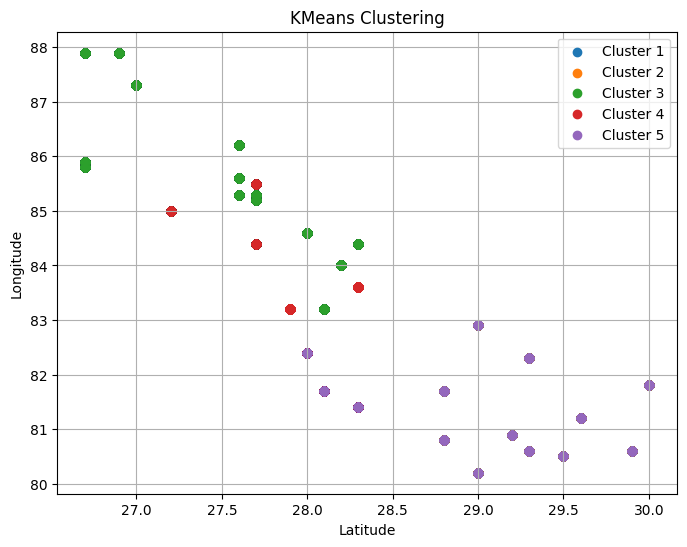

In [27]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(5):  # Change the range based on the number of clusters
    plt.scatter(
        X_cluster.iloc[labels == cluster_label, 1],  # X-axis (example: 'LAT' feature)
        X_cluster.iloc[labels == cluster_label, 2],  # Y-axis (example: 'LON' feature)
        label=f'Cluster {cluster_label + 1}'
    )

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()